In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon
import seaborn as sns
import geopandas as gpd

/media/DATA/anaconda/envs/jupyter-demo/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


# Game of life

In 1970 the British Mathematician John Conway created his "Game of Life" -- 
a set of rules that mimics the chaotic yet patterned growth of a colony of biological organisms.  The "game" takes place on a two-dimensional grid consisting of "living" and "dead" cells, and the rules to step from generation to generation are simple:

- **Overpopulation:** if a living cell is surrounded by more than three living cells, it dies.
- **Stasis:** if a living cell is surrounded by two or three living cells, it survives.
- **Underpopulation:** if a living cell is surrounded by fewer than two living cells, it dies.
- **Reproduction:** if a dead cell is surrounded by exactly three cells, it becomes a live cell.

By enforcing these rules in sequential steps, beautiful and unexpected patterns can appear.

## Short:
* **overpopulation**: > 3 nbs  <font color="#386BBC">dead</font>
* **statis - surviving**: 2/3 nbs <font color="#386BBC">staying alive</font>
* **underpopulation**: < 2 nbs <font color="#386BBC">dead</font>
* **reproduction**: == 3nbs <font color="#386BBC">birth</font>

Implementation, using scipy package in python translates these rules:

In [3]:
def life_step(X):
    """Game of life step using scipy tools"""
    from scipy.signal import convolve2d
    nbrs_count = convolve2d(X, np.ones((3, 3)), mode='same', boundary='wrap') - X
    return (nbrs_count == 3) | (X & (nbrs_count == 2))

As such, we can calculate a next step by running this function

To illustrate the importance of the initialization, let's consider the following situation. 

In [17]:
# A custom function was written to perform the function a number of times and visualize the output:
from support_functions import life_animation


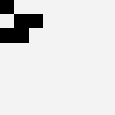
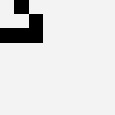
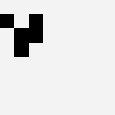
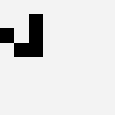
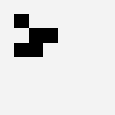
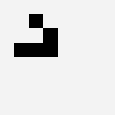
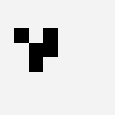
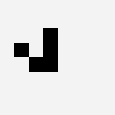
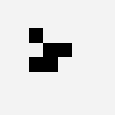
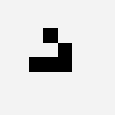
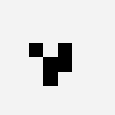
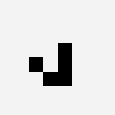
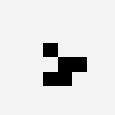
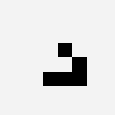
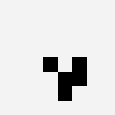
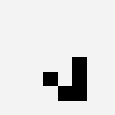
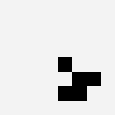
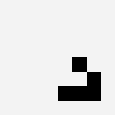
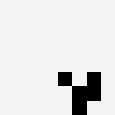
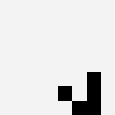
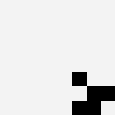
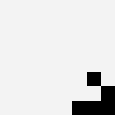
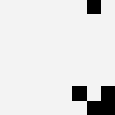
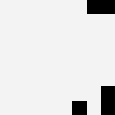
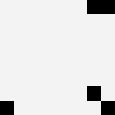
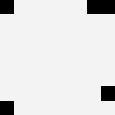
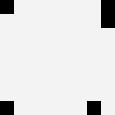
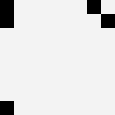
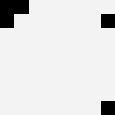
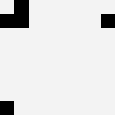
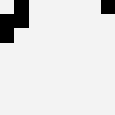
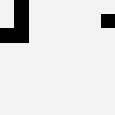

In [20]:
glider = [[1, 0, 0],
          [0, 1, 1],
          [1, 1, 0]]
X = np.zeros((8, 8))
X[:3, :3] = glider
life_animation(X, dpi=5, frames=32, interval=100) 

### Quest for special configurations

* oscillators
* static configuration

In [21]:
#%run talktools.py

# Handling GIS information

The government is going to an open data policy, making more and more datasets available to the public. 

For example, City Ghent has an open data platform [Open data portal Ghent](https://data.stad.gent), with for example information about the districts, called *wijken*:

In [7]:
from IPython.display import IFrame

In [22]:
IFrame("https://data.stad.gent/datasets/wijken", width=850, height=300)

Reading in the data: to visualize is, explore it and use it for our own research/purpose:

In [23]:
import json

with open('wijken.json') as f:
    data = json.load(f)

In [10]:
wijken = {}
for region in data['Document']['Folder']['Placemark']:
    coordinaten = region['Polygon']['outerBoundaryIs']['LinearRing']['coordinates']['@text']
    coordclean = [coordcouple[:-2] for coordcouple in coordinaten.split(' ')]
    wijknaam = region['ExtendedData']['SchemaData']['SimpleData'][4]['@text']
    wijken[wijknaam] = Polygon([(float(ccc.split(',')[0]), float(ccc.split(',')[1])) for ccc in coordclean])

In [11]:
temp = gpd.GeoSeries([shape for shape in wijken.values()])
wijken_gent = gpd.GeoDataFrame(temp)
wijken_gent.columns = ['geometry']
wijken_gent['names'] = wijken.keys()

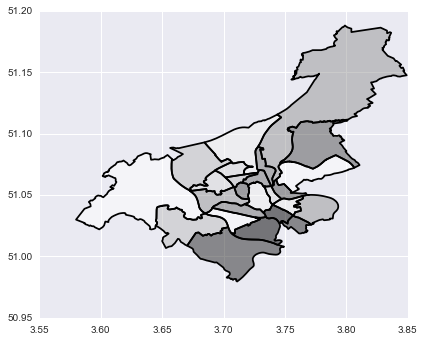

In [12]:
ax = wijken_gent.plot()

It would be more interesting to show this on a background of a map like google maps or openstreetmap.

## Rendering a map:

To render it on top of a map, a tool enables the combination of figures and open street map, supported by the interactivity of the notebook:

In [13]:
import mplleaflet

In [14]:
mplleaflet.display(fig=ax.figure)

In [15]:
#pip install git+https://github.com/jakevdp/JSAnimation.git@master